In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('Bicycle/train.csv')
test = pd.read_csv('Bicycle/test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
train.info()
#無空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()
#無空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


# Feature Engineering

In [10]:
#去掉count欄位中的離群值
print("Outliers 前的shape: ", train.shape)
train = train[np.abs(train['count'] - train['count'].mean())<= (3*train['count'].std())]
print("Outlier 後的shape:", train.shape)                                                                

Outliers 前的shape:  (10886, 12)
Outlier 後的shape: (10739, 12)


In [11]:
#合併train和test的資料一起做資料前處理
data = train.append(test)
data.reset_index(inplace = True) #將test資料的index值依照train資料的值往下排序
data.drop('index', inplace = True, axis = 1) #append資料後會生成新的index欄位，但我們不要，所以刪掉

In [12]:
print(data['datetime'])
print('------')
print(type(data['datetime'][0]))

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
17227    2012-12-31 19:00:00
17228    2012-12-31 20:00:00
17229    2012-12-31 21:00:00
17230    2012-12-31 22:00:00
17231    2012-12-31 23:00:00
Name: datetime, Length: 17232, dtype: object
------
<class 'str'>


In [13]:
data['date'] = data['datetime'].apply(lambda x : x.split()[0])
data['hour'] = data['datetime'].apply(lambda x : x.split()[1].split(":")[0]).astype('int')
data['year'] = data['datetime'].apply(lambda x : x.split()[0].split("-")[0])

In [14]:
#time strptime() 函數根據指定的格式把一個時間"字符串"解析為時間元組
data['weekday'] = data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())
#.weekday()函式返回的是當前日期所在的星期數0-6代表週一至週日
print(data['weekday'])

data['month'] = data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)
print(data['month'])

0        5
1        5
2        5
3        5
4        5
        ..
17227    0
17228    0
17229    0
17230    0
17231    0
Name: weekday, Length: 17232, dtype: int64
0         1
1         1
2         1
3         1
4         1
         ..
17227    12
17228    12
17229    12
17230    12
17231    12
Name: month, Length: 17232, dtype: int64


In [15]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,19,2012,0,12
17228,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,20,2012,0,12
17229,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,21,2012,0,12
17230,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,22,2012,0,12


C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

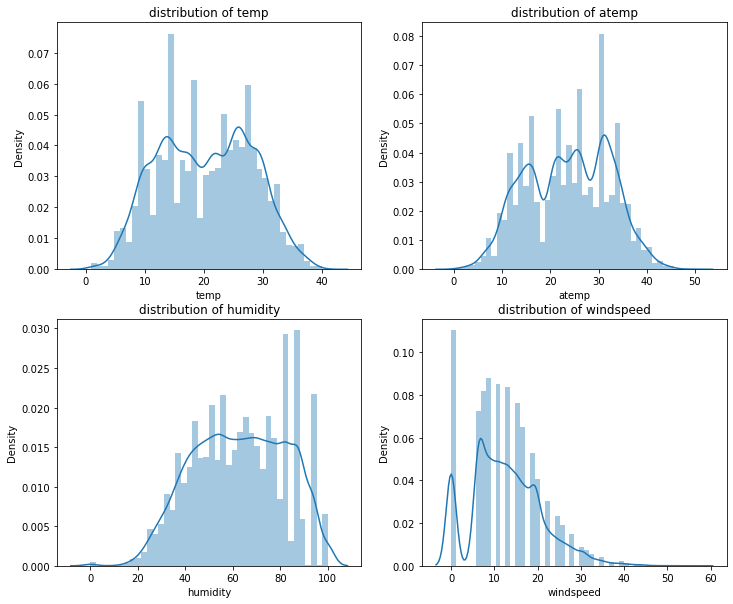

In [16]:
#來看其他資料的分布狀況
#建立2x2的圖表格
fig, axes = plt.subplots(nrows = 2, ncols = 2)
#調整圖表大小
fig.set_size_inches(12,10)
#設置要放的資料的位置
sns.distplot(data['temp'], ax = axes[0][0])
sns.distplot(data['atemp'], ax = axes[0][1])
sns.distplot(data['humidity'], ax = axes[1][0])
sns.distplot(data['windspeed'], ax = axes[1][1])

axes[0][0].set(xlabel = 'temp', title = 'distribution of temp')
axes[0][1].set(xlabel = 'atemp', title = 'distribution of atemp')
axes[1][0].set(xlabel = 'humidity', title = 'distribution of humidity')
axes[1][1].set(xlabel = 'windspeed', title = 'distribution of windspeed')

In [17]:
dataWind0 = data[data['windspeed'] == 0]
dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,2012-12-29 12:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,12,2012,5,12
17173,2012-12-29 13:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,13,2012,5,12
17175,2012-12-29 15:00:00,1,0,0,2,9.84,12.120,87,0.0,NaN,NaN,NaN,2012-12-29,15,2012,5,12
17183,2012-12-29 23:00:00,1,0,0,2,10.66,12.120,60,0.0,NaN,NaN,NaN,2012-12-29,23,2012,5,12


In [18]:
#發現windspeed的資料很多數據的值是0，有可能是沒有測到就直接填0，這樣不利於訓練
dataWind0 = data[data['windspeed'] == 0]
dataWindNot0 = data[data['windspeed'] != 0]
rfModel_wind = RandomForestRegressor(n_estimators = 1000, random_state = 42)
windColumns = ['season','weather','humidity','month','temp','year','atemp']
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed'])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])

In [19]:
wind0Values

array([ 6.97859907,  6.72315889,  6.72315889, ...,  7.44930512,
       25.85970089,  7.03332805])

In [20]:
dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,2012-12-29 12:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,12,2012,5,12
17173,2012-12-29 13:00:00,1,0,0,3,8.20,12.120,100,0.0,NaN,NaN,NaN,2012-12-29,13,2012,5,12
17175,2012-12-29 15:00:00,1,0,0,2,9.84,12.120,87,0.0,NaN,NaN,NaN,2012-12-29,15,2012,5,12
17183,2012-12-29 23:00:00,1,0,0,2,10.66,12.120,60,0.0,NaN,NaN,NaN,2012-12-29,23,2012,5,12


In [21]:
dataWind0.loc[:,'windspeed'] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace = True)
data.drop('index', inplace = True, axis =1)

C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

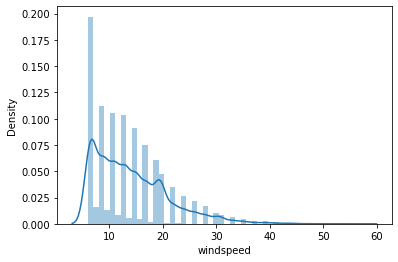

In [22]:
sns.distplot(data['windspeed'])

In [23]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by = ['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by = ['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsLog = np.log(yLabels)

In [24]:
#除掉不重要的資訊欄位
dropFeatures = ['casual', 'count', 'datetime', 'date', 'registered']
dataTrain = dataTrain.drop(dropFeatures, axis = 1)
dataTest = dataTest.drop(dropFeatures, axis = 1)

C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

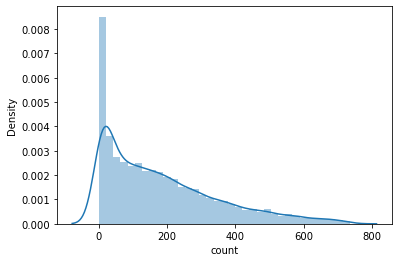

In [25]:
sns.distplot(yLabels)
#發現yLabels不是一個常態分布，需要取log，讓資料呈現常態分布

C:\Users\Becky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

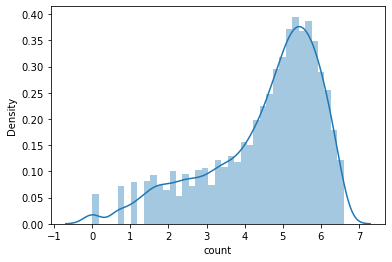

In [26]:
sns.distplot(yLabelsLog)

In [34]:
rfModel = RandomForestRegressor(n_estimators = 1000, random_state = 60)
rfModel.fit(dataTrain, yLabelsLog)
preds = rfModel.predict(X = dataTrain)

In [33]:
rfModel.predict_proba(dataTrain)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [35]:
preds

array([3.00090635, 3.42169657, 3.18762287, ..., 5.17500481, 4.93518066,
       4.55552049])

In [36]:
#要提交的資料是predict後的datatest
predsTest = rfModel.predict(X = dataTest)
predsTest

array([2.34179913, 1.56530363, 1.04714064, ..., 4.94816249, 4.68662991,
       4.06485704])

In [37]:
#將dataTest資料pd.log()後的資料轉回原本的值，使用 exp()
submission = pd.DataFrame({
    'datetime': datetimecol,
    'count':[max(0, x) for x in np.exp(predsTest)]
})
submission.to_csv('Bicycle/bicycle_prediction.csv', index = False)

In [38]:
predict = pd.read_csv('Bicycle/bicycle_prediction.csv')
predict

,datetime,count
0,2011-01-20 00:00:00,10.399931
1,2011-01-20 01:00:00,4.784127
2,2011-01-20 02:00:00,2.849492
3,2011-01-20 03:00:00,3.070938
4,2011-01-20 04:00:00,2.618518
...,...,...
6488,2012-12-31 19:00:00,291.314895
6489,2012-12-31 20:00:00,200.031821
6490,2012-12-31 21:00:00,140.915791
6491,2012-12-31 22:00:00,108.486952
